In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load dataset (Replace with actual path)
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\question4-stock-data.csv")

# Convert Inf values to NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()


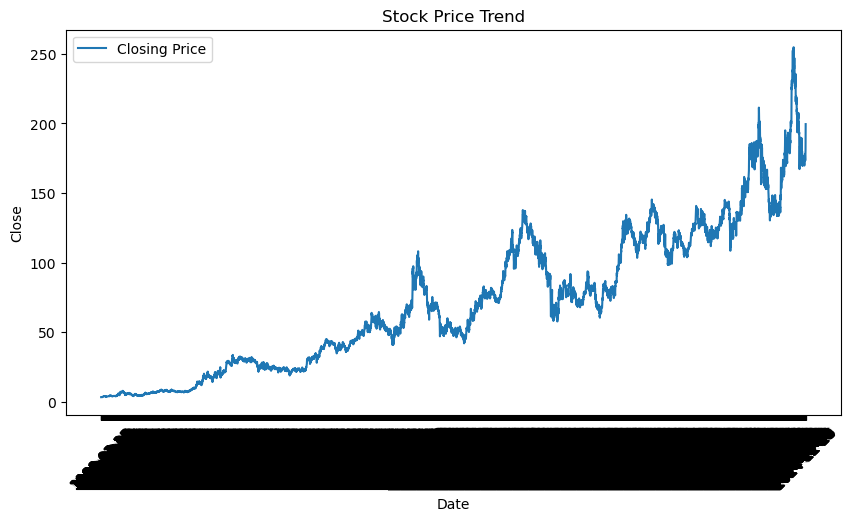

In [2]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Date', y='Close', label='Closing Price')
plt.xticks(rotation=45)
plt.title('Stock Price Trend')
plt.show()

In [3]:
# Feature Engineering
df['Moving_Avg_5'] = df['Close'].rolling(window=5).mean()
df['Moving_Avg_20'] = df['Close'].rolling(window=20).mean()
df['Lag_1'] = df['Close'].shift(1)

In [4]:
# Drop NaN values after feature creation
df = df.dropna()

# Prepare data for ML model
features = ['Moving_Avg_5', 'Moving_Avg_20', 'Lag_1']
X = df[features]
y = df['Close'].shift(-5).dropna()
X = X[:-5]

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Model Training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [7]:
# Model Evaluation
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

RMSE: 3.099794335450792


In [8]:
# Save Predictions
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predictions.to_csv('predictions.csv', index=False)
